In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pybaselines

In [2]:
plt.rcParams["figure.figsize"] = [5.0, 5.0]
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 10 # 全体のフォントサイズが変更されます。
plt.rcParams['xtick.labelsize'] = 10 # 軸だけ変更されます。
plt.rcParams['ytick.labelsize'] = 10 # 軸だけ変更されます
plt.rcParams['xtick.direction'] = 'in' # x axis in
plt.rcParams['ytick.direction'] = 'in' # y axis in 
plt.rcParams['axes.grid'] = False # make grid

In [101]:
data_file = 'file'

df = pd.read_csv(data_file, index_col=0)


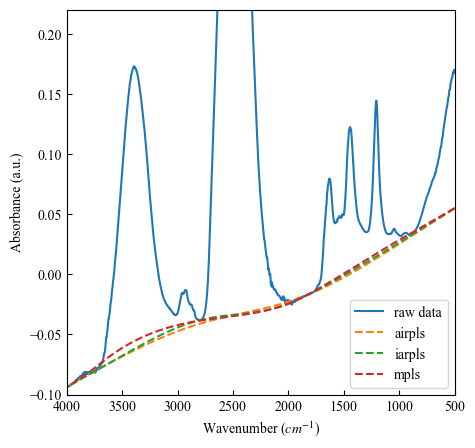

In [102]:

data = df.iloc[:, 1]

x = data.index
y = data.values

bkg_1 = pybaselines.spline.pspline_airpls(y, lam=1e4)[0]
bkg_2 = pybaselines.whittaker.iarpls(y, lam=1e7)[0]
bkg_3 = pybaselines.morphological.mpls(y, lam=1e7)[0]


plt.xlim(4000, 500)
plt.ylim(-0.1, 0.22)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')
plt.plot(x, y, label='raw data', lw=1.5)
plt.plot(x, bkg_1, '--', label='airpls')
plt.plot(x, bkg_2, '--', label='iarpls')
plt.plot(x, bkg_3, '--', label='mpls')

plt.plot(x, y - bkg_1, label='baseline collection with airpls')
plt.plot(x, y - bkg_2, label='baseline collection with iarpls')
plt.plot(x, y - bkg_3, label='baseline collection with mpls')

plt.legend()
#plt.savefig("/Users/chikamishunta/Desktop/Hydrophilic polymer/Figure/Sacran_0.5/baseline_correction_last.png", format="png", dpi=300)
plt.show()



In [103]:
# 空のデータフレームの作成
cols = df.columns
index = df.index
correction_data = pd.DataFrame(index=index, columns=cols)

In [104]:
# 全てのデータに対してベースラインの補正
for i in range(len(df.T)):
    data = df.iloc[:, i]
    y = data.values
    bkg_3 = pybaselines.morphological.mpls(y, lam=1e7)[0]
    y = y - bkg_3
    correction_data.iloc[:, i] = y
correction_data.to_csv("")

Text(0, 0.5, 'Absorbance (a.u.)')

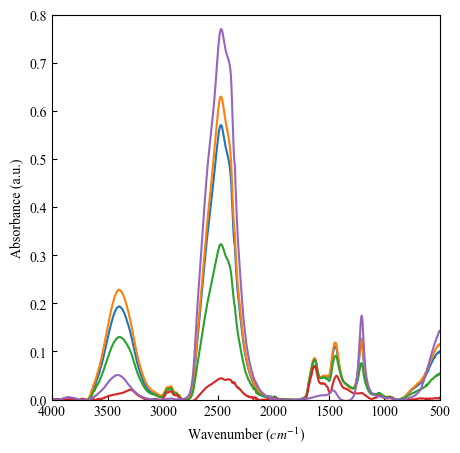

In [105]:
list = []
for i in range(len(correction_data.T)):
    list.append(str(i))
data = correction_data.set_axis(list, axis='columns')

z = data.values.T
y = data.columns.astype(float)
x = data.index.astype(float)

for i in range(len(correction_data.T)):
    plt.plot(x, z.T[:, i])
plt.xlim(4000, 500)
plt.ylim(0, 0.8)
plt.xlabel('Wavenumber ($cm^{-1}$)')
plt.ylabel('Absorbance (a.u.)')

